 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [6]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [7]:
# Set the path of the CSV files
#C:C:\Users\Wai Fatt Yee\Course_Material\MONU-VIRT-FIN-PT-02-2022-U-LOL\Unit 4 Pandas\Homework\Instructions\Starter_Code\Resources
whale_returns_path = Path('Resources/whale_returns.csv')
algo_returns_path = Path('Resources/algo_returns.csv')
sp_tsx_history_path = Path('Resources/sp_tsx_history.csv')

# Read in all data
whale_returns = pd.read_csv(whale_returns_path, parse_dates=True, infer_datetime_format=True, index_col='Date')
algo_returns = pd.read_csv(algo_returns_path, parse_dates=True, infer_datetime_format=True,index_col='Date' )
sp_tsx_history = pd.read_csv(sp_tsx_history_path, parse_dates=True, infer_datetime_format=True, index_col='Date')

In [8]:
# View the top 5 rows of data
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [9]:
# Determine data types
whale_returns.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [10]:
# Get a summary information of the data
whale_returns.info

<bound method DataFrame.info of             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
...                               ...                 ...   
2019-04-25                  -0.000285           -0.001291   
2019-04-26                   0.008149            0.009162   
2019-04-29                   0.001254            0.002719   
2019-04-30                  -0.001295           -0.002211   
2019-05-01                  -0.005847           -0.001341   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN   

In [11]:
# View summary statistics of numeric columns 
whale_returns.describe()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
count,1059.000000,1059.000000,1059.000000,1059.000000
mean,0.000179,-0.000203,-0.000081,0.000501
std,0.007842,0.006977,0.010824,0.012831
min,-0.032711,-0.032099,-0.139820,-0.066505
25%,-0.003594,-0.003961,-0.004746,-0.005515
50%,0.000467,0.000000,0.000232,0.000617
75%,0.004292,0.003567,0.005176,0.007516
max,0.042977,0.029338,0.080705,0.061341


In [12]:
# Check for duplicates
whale_returns.duplicated().sum()

38

In [13]:
# Extract duplicate rows to check for need to exclude - all ok as all dates are unique
whale_returns.loc[whale_returns.duplicated(), :]

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-05-14,0.0,0.0,0.0,0.0
2015-07-03,0.0,0.0,0.0,0.0
2015-08-11,0.0,0.0,0.0,0.0
2015-08-12,0.0,0.0,0.0,0.0
2015-08-13,0.0,0.0,0.0,0.0
2015-09-07,0.0,0.0,0.0,0.0
2015-11-12,0.0,0.0,0.0,0.0
2015-11-13,0.0,0.0,0.0,0.0
2015-11-26,0.0,0.0,0.0,0.0


In [14]:
# Determine the number of null values
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [15]:
# Declare variable
labels = ['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC']
# Replace nulls with '0' and confirm result
whale_returns = (whale_returns.loc[:,labels].fillna(0))
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [16]:
# Sort data in ascending order
whale_returns.sort_index()
whale_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,0.000000,0.000000,0.000000,0.000000
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [17]:
# View the top 5 rows of data
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [18]:
# Determine data types
algo_returns.dtypes

Algo 1    float64
Algo 2    float64
dtype: object

In [19]:
# Get a summary information of the data
algo_returns.info

<bound method DataFrame.info of               Algo 1    Algo 2
Date                          
2014-05-28  0.001745       NaN
2014-05-29  0.003978       NaN
2014-05-30  0.004464       NaN
2014-06-02  0.005692       NaN
2014-06-03  0.005292       NaN
...              ...       ...
2019-04-25  0.000682 -0.007247
2019-04-26  0.002981  0.005256
2019-04-29  0.005208  0.002829
2019-04-30 -0.002944 -0.001570
2019-05-01  0.000094 -0.007358

[1241 rows x 2 columns]>

In [20]:
# View summary statistics of numeric columns 
algo_returns.describe()

,Algo 1,Algo 2
count,1241.000000,1235.000000
mean,0.000667,0.000341
std,0.007972,0.008466
min,-0.030951,-0.036937
25%,-0.003238,-0.003733
50%,0.000135,0.000581
75%,0.003978,0.005194
max,0.098246,0.083734


In [21]:
# Check for duplicates
algo_returns.duplicated().sum()

0

In [22]:
# Determine the number of null values
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [23]:
# Replace nulls with '0' and confirm result
algo_returns.fillna(0, inplace=True)
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [24]:
# Sort data in ascending order
algo_returns.sort_index()
algo_returns

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,0.000000
2014-05-29,0.003978,0.000000
2014-05-30,0.004464,0.000000
2014-06-02,0.005692,0.000000
2014-06-03,0.005292,0.000000
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [25]:
# Read a sample data of S&P TSX 60 Closing Prices
sp_tsx_history.sample(5) 

,Close
Date,
2013-12-04,"$13,304.92"
2013-01-18,"$12,725.69"
2018-03-09,"$15,577.81"
2014-09-25,"$14,893.57"
2019-05-28,"$16,297.46"


In [26]:
# Check Data Types
sp_tsx_history.dtypes

Close    object
dtype: object

In [27]:
# Remove '$' symbol from string
sp_tsx_history['Close'] = sp_tsx_history['Close'].str.replace("$","")

C:\Users\Wai Fatt Yee\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [28]:
# Remove ',' from string
sp_tsx_history['Close'] = sp_tsx_history['Close'].str.replace(",","")

In [29]:
# Convert `Close` from `object` to `float`
sp_tsx_history['Close'] = sp_tsx_history['Close'].astype('float')
# sp_tsx_history

In [30]:
# Confirm results
sp_tsx_history.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [31]:
# Confirm that Data Types is now float
sp_tsx_history.dtypes

Close    float64
dtype: object

In [32]:
# Get a summary information of the data
sp_tsx_history.info

<bound method DataFrame.info of                Close
Date                
2012-10-01  12370.19
2012-10-02  12391.23
2012-10-03  12359.47
2012-10-04  12447.68
2012-10-05  12418.99
...              ...
2019-12-20  17118.44
2019-12-23  17128.71
2019-12-24  17180.15
2019-12-27  17168.21
2019-12-30  17098.56

[1818 rows x 1 columns]>

In [33]:
# View summary statistics of numeric columns 
sp_tsx_history.describe()

,Close
count,1818.000000
mean,14678.202233
std,1328.337613
min,11811.380000
25%,13621.362500
50%,14923.545000
75%,15629.085000
max,17180.150000


In [34]:
# Check for duplicates
sp_tsx_history.duplicated().value_counts()

False    1814
True        4
dtype: int64

In [127]:
# Extract duplicate rows to check for need to exclude - all ok as all dates are unique, appears to be identical value on different dates
sp_tsx_history.loc[sp_tsx_history.duplicated(), : ]

,Close
Date,
2016-07-20,14533.57
2017-03-29,15657.63
2018-08-30,16371.55
2019-02-27,16074.30


In [36]:
# Determine the number of null values
sp_tsx_history.isnull().sum()

Close    0
dtype: int64

In [37]:
# Sort data in ascending order
sp_tsx_history.sort_index()
sp_tsx_history

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99
...,...
2019-12-20,17118.44
2019-12-23,17128.71
2019-12-24,17180.15


In [38]:
# Calulate percentage change
sptsx_returns = sp_tsx_history.pct_change()
sptsx_returns

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


In [39]:
# Rename `Close` column to be specific to this portfolio.
sptsx_returns.columns=['S&P TSX 60']
sptsx_returns.head()

,S&P TSX 60
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [40]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
all_returns = pd.concat([whale_returns, algo_returns, sptsx_returns], axis='columns' , join='inner')
all_returns = all_returns.sort_index()
all_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-02,0.000000,0.000000,0.000000,0.000000,-0.008158,0.003200,0.001950
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


In [41]:
# Confirm Data Types are float 
all_returns.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
Algo 1                         float64
Algo 2                         float64
S&P TSX 60                     float64
dtype: object

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

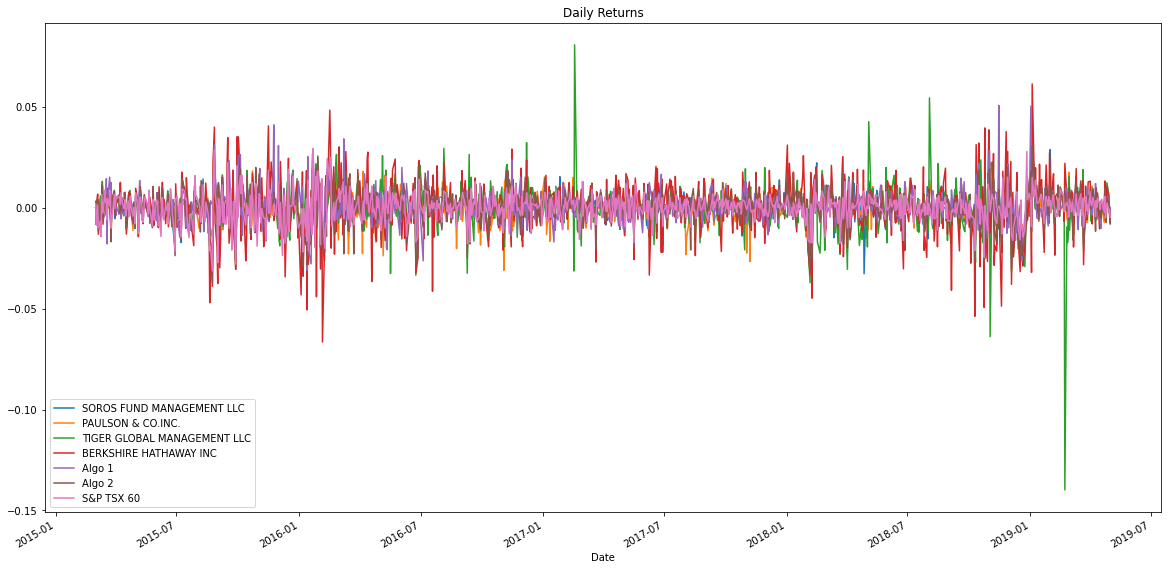

In [42]:
# Plot daily returns of all portfolios
all_returns.plot(figsize=(20,10), title='Daily Returns')

#### Calculate and Plot cumulative returns.

In [43]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + all_returns).cumprod()
# cumulative_returns.head()
cumulative_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-02,1.000000,1.000000,1.000000,1.000000,0.991842,1.003200,1.001950
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.989916,1.002247,0.993404
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.981414,1.004669,0.990055
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.980476,1.009012,0.991386
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.975616,0.997449,0.981500


<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

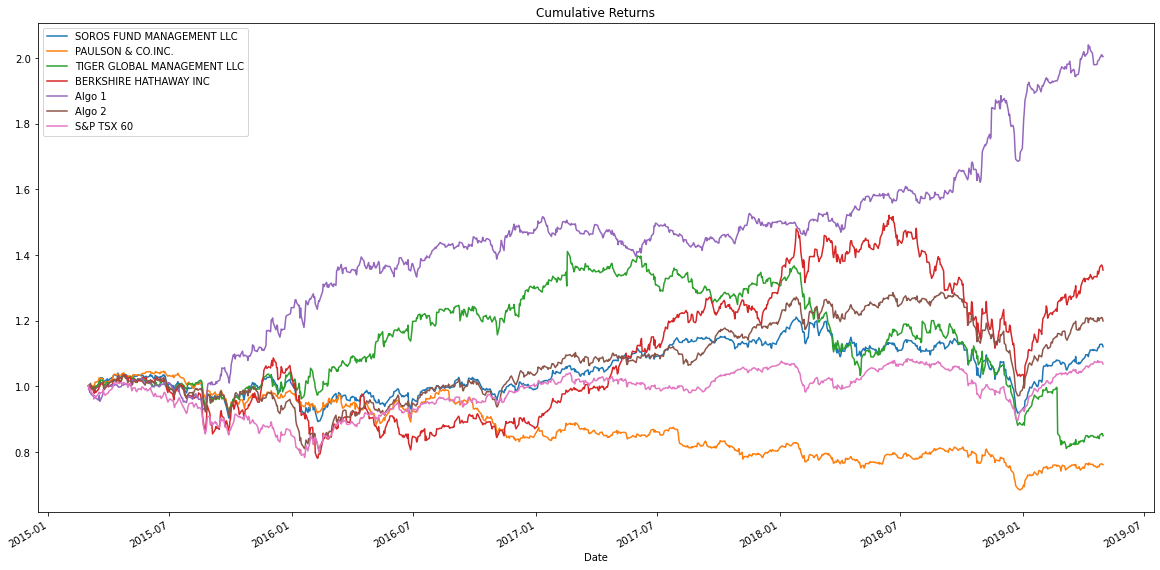

In [44]:
# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10), title='Cumulative Returns')

In [45]:
# Print conclusion from cumulative returns calculated for the portfolios
print('It is apparent that Algo 1 has outperformed the market and the rest of the funds\nwith steady and consistent growth during the period. Even Algo 2 has beaten the \nmarket and performed relatively better than the rest of the funds with the exception \nof Berkshire Hathaway.')

It is apparent that Algo 1 has outperformed the market and the rest of the funds
with steady and consistent growth during the period. Even Algo 2 has beaten the 
market and performed relatively better than the rest of the funds with the exception 
of Berkshire Hathaway.


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


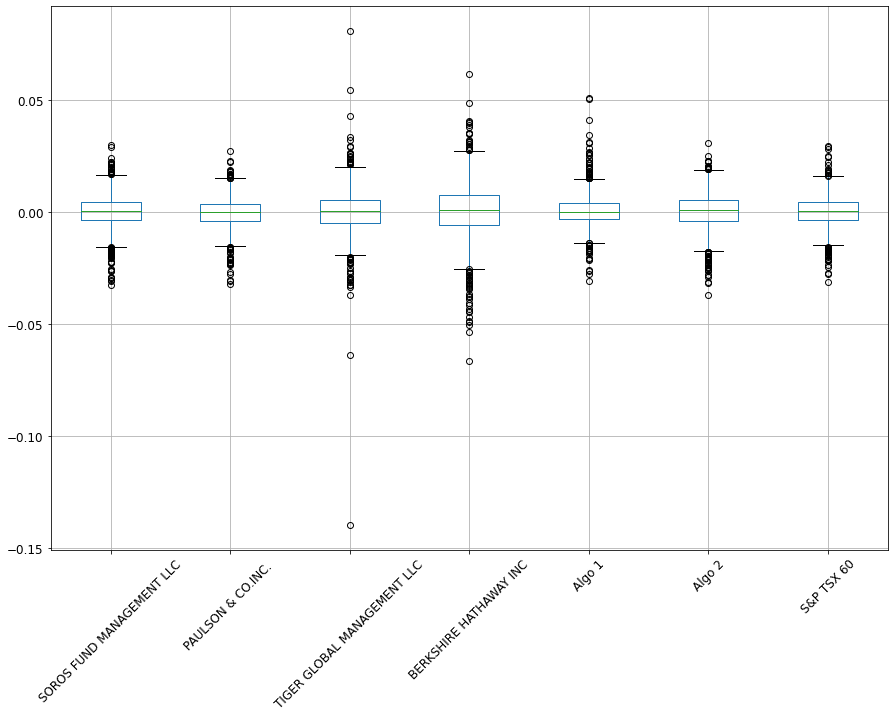

In [46]:
# Box plot to visually show risk
boxplot = all_returns.boxplot(figsize=(15,10), rot=45, fontsize=12)

### Calculate Standard Deviations

In [47]:
# Calculate the daily standard deviations of all portfolios
daily_std = all_returns.std()
daily_std.sort_values(ascending= False)

BERKSHIRE HATHAWAY INC         0.012819
TIGER GLOBAL MANAGEMENT LLC    0.010877
Algo 2                         0.008323
SOROS FUND MANAGEMENT LLC      0.007824
Algo 1                         0.007590
S&P TSX 60                     0.007031
PAULSON & CO.INC.              0.006979
dtype: float64

In [48]:
# Calculate  the daily standard deviation of S&P TSX 60
daily_std_sptsx = sptsx_returns.std()
daily_std_sptsx

S&P TSX 60    0.006637
dtype: float64

In [141]:
# Print conclusion on calculated daily standard deviation of S&P TSX 60
print('The daily standard deviation of S&P TSX is slightly different from the one calculated using the concatinated\r\nDataframe due to the difference in time period between the two series of data. To compare like-for-like,\nit is best to use the results calculated from concatenated Dataframe in this instance.') 

The daily standard deviation of S&P TSX is slightly different from the one calculated using the concatinated
Dataframe due to the difference in time period between the two series of data. To compare like-for-like,
it is best to use the results calculated from concatenated Dataframe in this instance.


### Determine which portfolios are riskier than the S&P TSX 60

In [50]:
# Determine which portfolios are riskier than the S&P TSX 60

risky_portfolio = daily_std >= 0.007031
daily_std[risky_portfolio]

SOROS FUND MANAGEMENT LLC      0.007824
TIGER GLOBAL MANAGEMENT LLC    0.010877
BERKSHIRE HATHAWAY INC         0.012819
Algo 1                         0.007590
Algo 2                         0.008323
dtype: float64

In [51]:
# Print conclusion on the funds' volatility 
print('All the funds except for Paulson & Co. Inc. appear to be more volatile (riskier) as compared to the S&P TSX 60')

All the funds except for Paulson & Co. Inc. appear to be more volatile (riskier) as compared to the S&P TSX 60


### Calculate the Annualized Standard Deviation

In [143]:
# Calculate the annualized standard deviation (252 trading days)
annualised_std = daily_std * np.sqrt(252)
annualised_std.sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.203500
TIGER GLOBAL MANAGEMENT LLC    0.172675
Algo 2                         0.132121
SOROS FUND MANAGEMENT LLC      0.124199
Algo 1                         0.120491
S&P TSX 60                     0.111613
PAULSON & CO.INC.              0.110787
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [53]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = all_returns.rolling(window=21).std()
rolling_std

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-04-25,0.004145,0.005572,0.004917,0.006641,0.005801,0.005764,0.003370
2019-04-26,0.004117,0.005649,0.005424,0.006599,0.005562,0.005700,0.003321
2019-04-29,0.004123,0.005374,0.005438,0.006584,0.005251,0.005622,0.003356


<AxesSubplot:title={'center':'Rolling 21-Day Standard Deviation'}, xlabel='Date'>

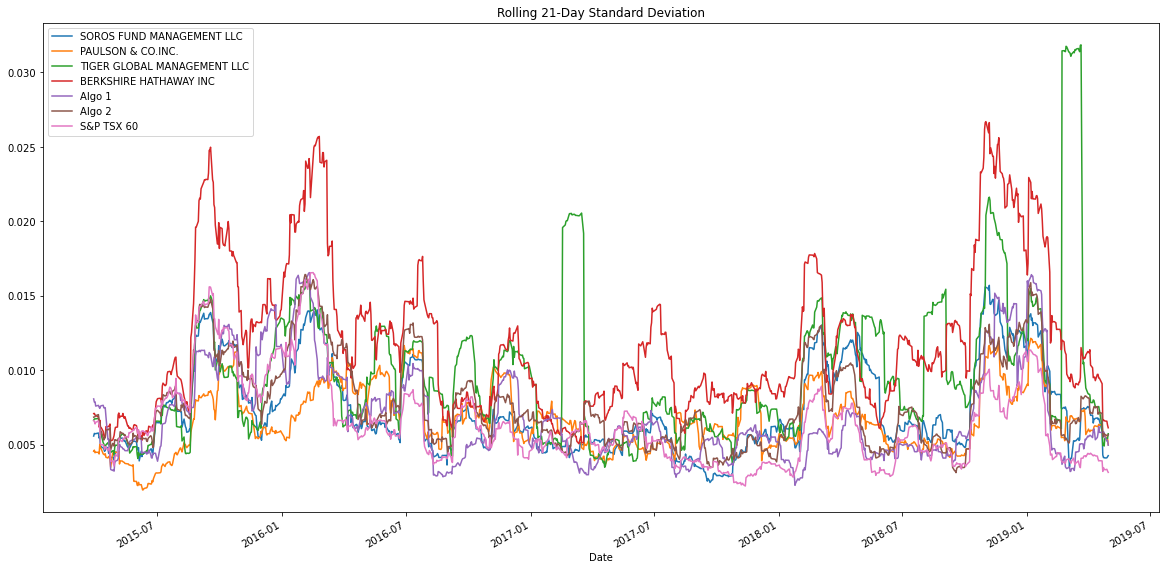

In [54]:
# Plot the rolling standard deviation
rolling_std.plot(figsize=(20,10), title='Rolling 21-Day Standard Deviation')

### Calculate and plot the correlation

In [55]:
# Calculate the correlation
correlation = all_returns.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
SOROS FUND MANAGEMENT LLC,1.000000,0.697074,0.560963,0.750181,0.313607,0.826609,0.673902
PAULSON & CO.INC.,0.697074,1.000000,0.433034,0.540031,0.266147,0.673984,0.486503
TIGER GLOBAL MANAGEMENT LLC,0.560963,0.433034,1.000000,0.423524,0.161119,0.506660,0.440571
BERKSHIRE HATHAWAY INC,0.750181,0.540031,0.423524,1.000000,0.289220,0.684556,0.557224
Algo 1,0.313607,0.266147,0.161119,0.289220,1.000000,0.284840,0.309759
Algo 2,0.826609,0.673984,0.506660,0.684556,0.284840,1.000000,0.737391
S&P TSX 60,0.673902,0.486503,0.440571,0.557224,0.309759,0.737391,1.000000


<AxesSubplot:>

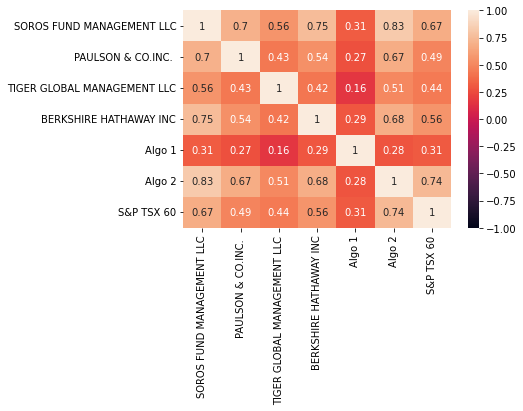

In [56]:
# Display de correlation matrix
import seaborn as sns
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True)

<AxesSubplot:>

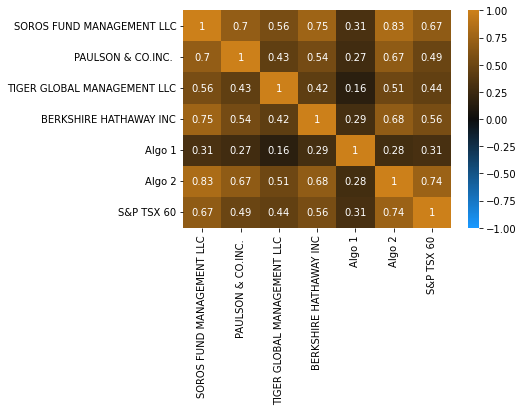

In [57]:
# Display the correlation matrix
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
clist = [(0.1, 0.6, 1.0), (0.05, 0.05, 0.05), (0.8, 0.5, 0.1)]
blue_orange_divergent = LinearSegmentedColormap.from_list("custom_blue_orange", clist)
sns.heatmap(correlation,vmin=-1, vmax=1,annot=True,cmap = blue_orange_divergent)

In [75]:
# Print conclusion on correlation
print('Based on the outcomes, Algo 1 and Soros Fund Management LLC are two funds in the pool that appear\r\nto be highly correlated to the S&P TSX 60 and will therefore, likely to mimick its performance.')

Based on the outcomes, Algo 1 and Soros Fund Management LLC are two funds in the pool that appear
to be highly correlated to the S&P TSX 60 and will therefore, likely to mimick its performance.


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [59]:
# Calculate covariance of a single portfolio - Algo 1
covariance_algo1 = all_returns['Algo 1'].cov(all_returns['S&P TSX 60'])
covariance_algo1


1.6530854432333164e-05

In [60]:
# Calculate variance of S&P TSX
variance_sptsx = all_returns['S&P TSX 60'].var()
variance_sptsx

4.9434802530161176e-05

In [61]:
# Computing beta
algo1_beta = covariance_algo1 / variance_sptsx
algo1_beta

0.33439709650397315

In [76]:
# Plot beta trend
algo1_beta.plot()


AttributeError: 'numpy.float64' object has no attribute 'plot'

<AxesSubplot:title={'center':'Rolling 60-Day Beta of Algo 1'}, xlabel='Date'>

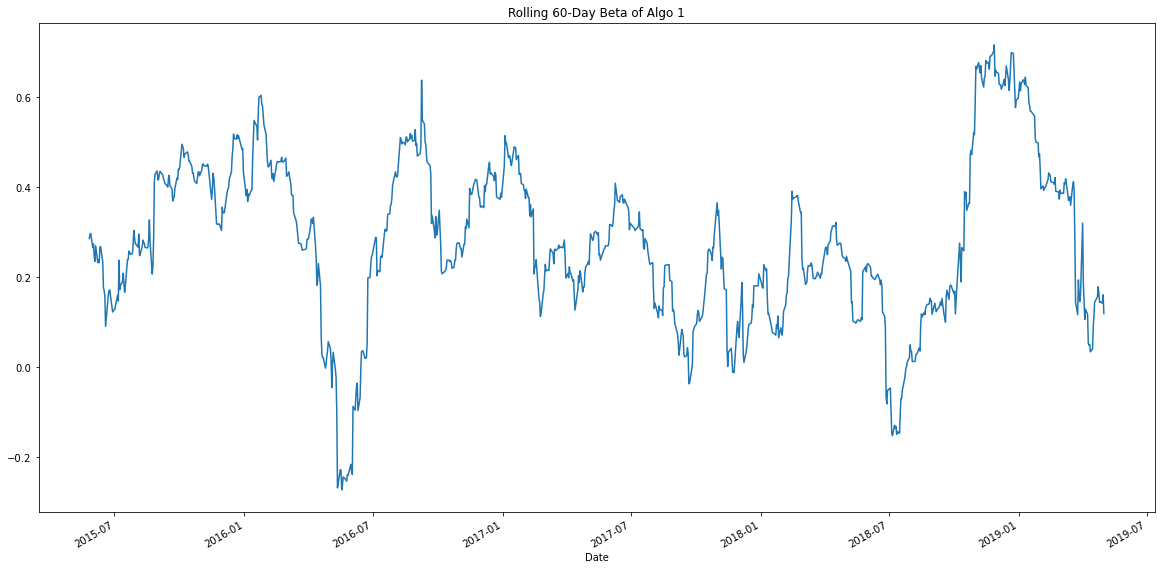

In [77]:
# Plot beta trend
rolling_algo1covariance = all_returns['Algo 1'].rolling(window=60).cov(all_returns['S&P TSX 60'])
rolling_sptsxvariance = all_returns['S&P TSX 60'].rolling(window=60).var()
rolling_algo1beta = rolling_algo1covariance / rolling_sptsxvariance
rolling_algo1beta.plot(figsize=(20,10), title='Rolling 60-Day Beta of Algo 1')

In [81]:
# Print conclusion on Algo 1 beta
print('Algo 1 has a rolling 60-day beta of under 1 for the most part of the period in review, \nwhich suggests that it was less volatile compared to the market (S&P TSX 60). In fact,\r\nthere were two brief periods where beta dropped below zero which suggests that the\r\nportfolio was negatively correlated to the market at those times.')

Algo 1 has a rolling 60-day beta of under 1 for the most part of the period in review, 
which suggests that it was less volatile compared to the market (S&P TSX 60). In fact,
there were two brief periods where beta dropped below zero which suggests that the
portfolio was negatively correlated to the market at those times.


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'Exponentially Weighted 21-day Moving Average'}, xlabel='Date'>

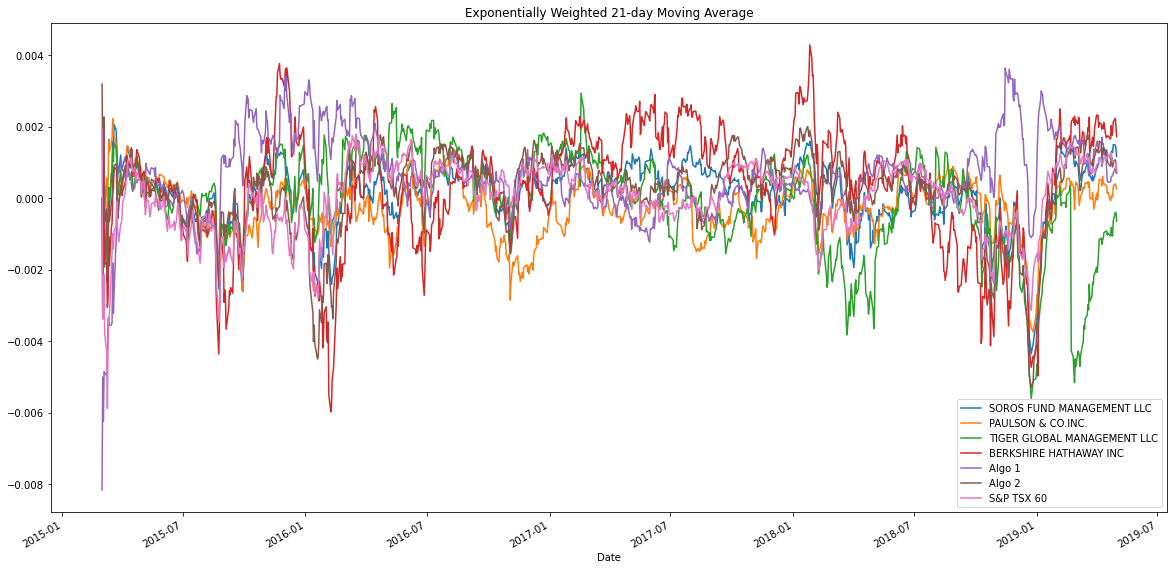

In [82]:
# Use `ewm` to calculate the rolling window
allreturns_ewm = all_returns.ewm(halflife=21).mean()
allreturns_ewm.plot(figsize=(20,10), title='Exponentially Weighted 21-day Moving Average')

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [83]:
# Annualized Sharpe Ratios
sharpe_ratios = ((all_returns.mean()-0) * 252) / (all_returns.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286570
PAULSON & CO.INC.             -0.547328
TIGER GLOBAL MANAGEMENT LLC   -0.144385
BERKSHIRE HATHAWAY INC         0.466818
Algo 1                         1.473237
Algo 2                         0.402526
S&P TSX 60                     0.199724
dtype: float64

In [84]:
# Annualized Sharpe Ratios
sharpe_ratios = ((all_returns.mean()-0) * 252) / np.sqrt((all_returns.var() * 252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286570
PAULSON & CO.INC.             -0.547328
TIGER GLOBAL MANAGEMENT LLC   -0.144385
BERKSHIRE HATHAWAY INC         0.466818
Algo 1                         1.473237
Algo 2                         0.402526
S&P TSX 60                     0.199724
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

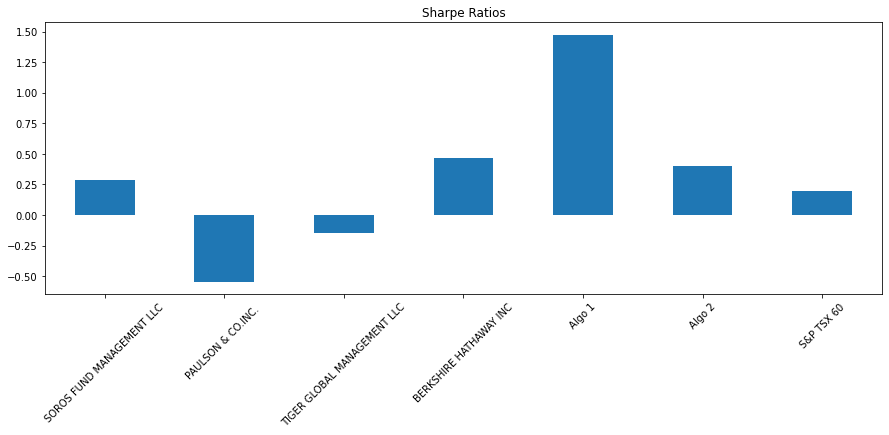

In [90]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios", figsize=(15,5),rot=45)

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

In [92]:
#Print observations on Sharpe ratios
print('On a risk adjusted basis, algorithemic trading portfolios appear to have outperformed the market (S&P TSX 60)\nas well as the whales portfolios with one minor exception where the Berhshire Hathaway portfolio seems to\nhave a slight edge over the Algo 2 portfolio.')

On a risk adjusted basis, algorithemic trading portfolios appear to have outperformed the market (S&P TSX 60)
as well as the whales portfolios with one minor exception where the Berhshire Hathaway portfolio seems to
have a slight edge over the Algo 2 portfolio.


---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [93]:
# Set the path of the CSV files
aapldaily_path = Path('Resources/aapl_historical.csv')
pepdaily_path = Path('Resources/pep_historical.csv')
vzdaily_path = Path('Resources/vz_historical.csv')
cbadaily_path = Path('Resources/cba_historical.csv')
qandaily_path = Path('Resources/qan_historical.csv')

# Read in all data
aapldaily = pd.read_csv(aapldaily_path, parse_dates=True, infer_datetime_format=True, index_col='Date')
pepdaily = pd.read_csv(pepdaily_path, parse_dates=True, infer_datetime_format=True,index_col='Date' )
vzdaily = pd.read_csv(vzdaily_path, parse_dates=True, infer_datetime_format=True, index_col='Date')
cbadaily = pd.read_csv(cbadaily_path, parse_dates=True, infer_datetime_format=True, index_col='Date')
qandaily = pd.read_csv(qandaily_path, parse_dates=True, infer_datetime_format=True, index_col='Date')

In [94]:
# Reading data from 1st stock (AAPL)
aapldaily.head()

,Close
Date,
2015-03-02,32.27
2015-03-03,32.34
2015-03-04,32.14
2015-03-05,31.60
2015-03-06,31.65


In [95]:
# Reading data from 2nd stock (PEP)
pepdaily.head()

,Close
Date,
2015-03-02,99.00
2015-03-03,98.40
2015-03-04,97.36
2015-03-05,97.23
2015-03-06,96.17


In [96]:
# Reading data from 3rd stock (VZ)
vzdaily.head()

,Close
Date,
2015-03-02,49.47
2015-03-03,49.55
2015-03-04,49.07
2015-03-05,48.92
2015-03-06,48.29


In [97]:
# Reading data from 4th stock (CBA)
cbadaily.head()

,Close
Date,
2015-03-02,92.17
2015-03-03,91.54
2015-03-04,90.75
2015-03-05,90.74
2015-03-06,90.71


In [98]:
# Reading data from 5th stock (QAN)
qandaily.head()

,Close
Date,
2015-03-02,3.08
2015-03-03,3.05
2015-03-04,3.06
2015-03-05,3.08
2015-03-06,3.06


In [99]:
# Combine all stocks in a single DataFrame
custom_portfolio = pd.concat([aapldaily, pepdaily, vzdaily, cbadaily, qandaily],axis='columns' , join='inner')
custom_portfolio


,Close,Close,Close,Close,Close
Date,,,,,
2015-03-02,32.27,99.00,49.47,92.17,3.08
2015-03-03,32.34,98.40,49.55,91.54,3.05
2015-03-04,32.14,97.36,49.07,90.75,3.06
2015-03-05,31.60,97.23,48.92,90.74,3.08
2015-03-06,31.65,96.17,48.29,90.71,3.06
...,...,...,...,...,...
2021-12-21,172.99,168.92,52.78,99.59,4.82
2021-12-22,175.64,169.97,52.77,99.78,4.84
2021-12-23,176.28,169.78,52.68,100.11,4.86


In [100]:
# Reset Date index
custom_portfolio = custom_portfolio.sort_index()
custom_portfolio

,Close,Close,Close,Close,Close
Date,,,,,
2015-03-02,32.27,99.00,49.47,92.17,3.08
2015-03-03,32.34,98.40,49.55,91.54,3.05
2015-03-04,32.14,97.36,49.07,90.75,3.06
2015-03-05,31.60,97.23,48.92,90.74,3.08
2015-03-06,31.65,96.17,48.29,90.71,3.06
...,...,...,...,...,...
2021-12-21,172.99,168.92,52.78,99.59,4.82
2021-12-22,175.64,169.97,52.77,99.78,4.84
2021-12-23,176.28,169.78,52.68,100.11,4.86


In [101]:
# Reorganize portfolio data by having a column per symbol and display sample data
custom_portfolio.columns=['AAPL','PEP','VZ', 'CBA','QAN']
custom_portfolio.sample(10)

,AAPL,PEP,VZ,CBA,QAN
Date,,,,,
2017-05-02,36.88,112.29,45.91,86.83,4.36
2021-02-09,136.01,139.60,55.00,87.42,4.83
2020-07-09,95.68,132.71,53.94,70.42,3.61
2016-03-10,25.29,100.78,52.32,76.14,3.86
2018-03-20,43.81,109.90,47.69,75.19,5.98
2020-12-17,128.70,145.71,60.01,84.72,5.10
2015-06-05,32.16,93.05,47.23,79.96,3.47
2020-02-25,72.02,141.10,57.12,86.80,5.90
2021-09-30,141.50,150.41,54.01,104.33,5.67


In [102]:
# Check for nulls and confirm Data Types and shape
custom_portfolio.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1685 entries, 2015-03-02 to 2021-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1685 non-null   float64
 1   PEP     1685 non-null   float64
 2   VZ      1685 non-null   float64
 3   CBA     1685 non-null   float64
 4   QAN     1685 non-null   float64
dtypes: float64(5)
memory usage: 79.0 KB


In [103]:
# Calculate daily returns
custom_returns = custom_portfolio.pct_change()
custom_returns

,AAPL,PEP,VZ,CBA,QAN
Date,,,,,
2015-03-02,NaN,NaN,NaN,NaN,NaN
2015-03-03,0.002169,-0.006061,0.001617,-0.006835,-0.009740
2015-03-04,-0.006184,-0.010569,-0.009687,-0.008630,0.003279
2015-03-05,-0.016801,-0.001335,-0.003057,-0.000110,0.006536
2015-03-06,0.001582,-0.010902,-0.012878,-0.000331,-0.006494
...,...,...,...,...,...
2021-12-21,0.019087,-0.002951,-0.005839,0.003931,0.008368
2021-12-22,0.015319,0.006216,-0.000189,0.001908,0.004149
2021-12-23,0.003644,-0.001118,-0.001706,0.003307,0.004132


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [104]:
# Set weights
weights = [0.2,0.2,0.2,0.2,0.2]

# Calculate portfolio return
customportfolio_returns = custom_returns.dot(weights)

# Display sample data
customportfolio_returns

Date
2015-03-02         NaN
2015-03-03   -0.003770
2015-03-04   -0.006358
2015-03-05   -0.002954
2015-03-06   -0.005804
                ...   
2021-12-21    0.004519
2021-12-22    0.005480
2021-12-23    0.001652
2021-12-29    0.016220
2021-12-30   -0.002950
Length: 1685, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [105]:
# Join your returns DataFrame to the original returns DataFrame
allportfolio_returns = pd.concat([all_returns, customportfolio_returns], axis='columns', join='inner')
allportfolio_returns = allportfolio_returns.sort_index()
allportfolio_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60,0
Date,,,,,,,,
2015-03-02,0.000000,0.000000,0.000000,0.000000,-0.008158,0.003200,0.001950,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530,-0.003770
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371,-0.006358
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344,-0.002954
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972,-0.005804
...,...,...,...,...,...,...,...,...
2019-04-24,0.002284,0.001009,-0.004000,-0.006386,0.001095,0.000399,-0.004972,0.005688
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,-0.009087
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788,0.000035


In [106]:
#Rename Custom Portfolion column
allportfolio_returns.rename(columns={0:'Custom Portfolio'}, inplace=True)
allportfolio_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60,Custom Portfolio
Date,,,,,,,,
2015-03-02,0.000000,0.000000,0.000000,0.000000,-0.008158,0.003200,0.001950,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530,-0.003770
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371,-0.006358
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344,-0.002954
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972,-0.005804
...,...,...,...,...,...,...,...,...
2019-04-24,0.002284,0.001009,-0.004000,-0.006386,0.001095,0.000399,-0.004972,0.005688
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,-0.009087
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788,0.000035


In [107]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
allportfolio_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P TSX 60                     0
Custom Portfolio               1
dtype: int64

In [108]:
# Drop nulls
allportfolio_returns.dropna(inplace=True)
allportfolio_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60,Custom Portfolio
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530,-0.003770
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371,-0.006358
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344,-0.002954
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972,-0.005804
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555,-0.006098
...,...,...,...,...,...,...,...,...
2019-04-24,0.002284,0.001009,-0.004000,-0.006386,0.001095,0.000399,-0.004972,0.005688
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,-0.009087
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788,0.000035


In [109]:
# Confirm no more nulls
allportfolio_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P TSX 60                     0
Custom Portfolio               0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

In [110]:
# Calculate the daily standard deviations of all portfolios
allportfolio_std = allportfolio_returns.std()
allportfolio_std.sort_values(ascending= False)

BERKSHIRE HATHAWAY INC         0.012884
TIGER GLOBAL MANAGEMENT LLC    0.010904
Algo 2                         0.008344
SOROS FUND MANAGEMENT LLC      0.007813
Custom Portfolio               0.007645
Algo 1                         0.007619
S&P TSX 60                     0.007034
PAULSON & CO.INC.              0.007003
dtype: float64

### Calculate the Annualized Standard Deviation

In [111]:
# Calculate the annualized `std`
allportfolio_annualised_std = allportfolio_std * np.sqrt(252)
allportfolio_annualised_std.sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.204524
TIGER GLOBAL MANAGEMENT LLC    0.173100
Algo 2                         0.132454
SOROS FUND MANAGEMENT LLC      0.124022
Custom Portfolio               0.121363
Algo 1                         0.120951
S&P TSX 60                     0.111660
PAULSON & CO.INC.              0.111170
dtype: float64

### Calculate and plot rolling `std` with 21-day window

In [112]:
# Calculate rolling standard deviation
allportfolio_returns_rollingstd = allportfolio_returns.rolling(window=21).std()
allportfolio_returns_rollingstd

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60,Custom Portfolio
Date,,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2019-04-24,0.004189,0.005424,0.004968,0.006861,0.005888,0.005535,0.003436,0.004707
2019-04-26,0.004184,0.005723,0.005511,0.006844,0.005903,0.005528,0.003367,0.005089
2019-04-29,0.004178,0.005642,0.005352,0.006841,0.005894,0.005467,0.003291,0.005074


<AxesSubplot:title={'center':'All Portfolio 21-Day Rolling Standard Deviation'}, xlabel='Date'>

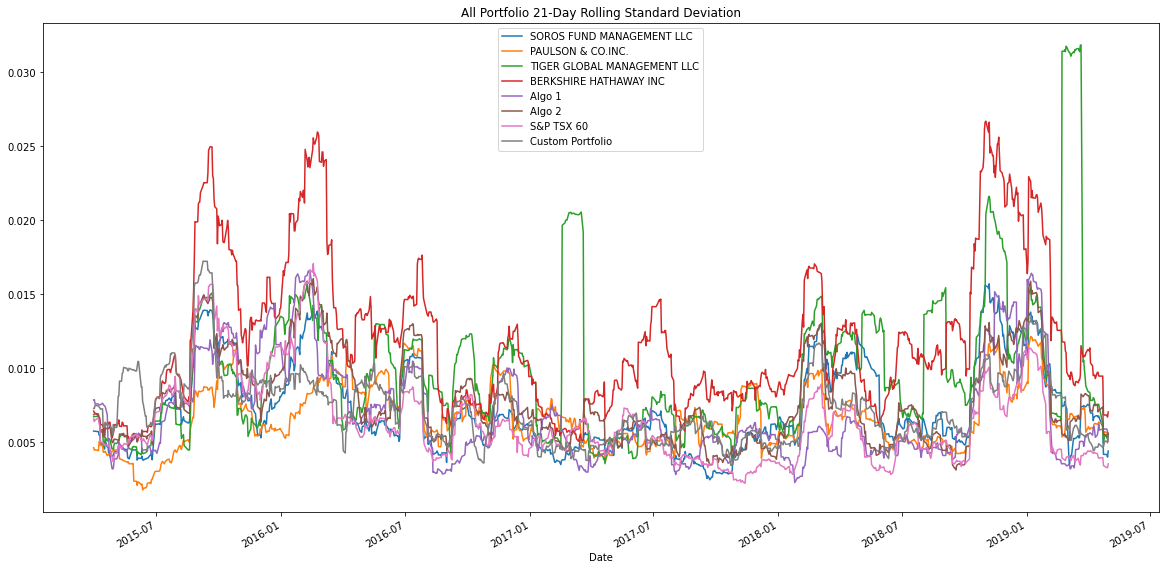

In [113]:
# Plot rolling standard deviation
allportfolio_returns_rollingstd.plot(figsize=(20,10), title='All Portfolio 21-Day Rolling Standard Deviation')

### Calculate and plot the correlation

In [114]:
# Calculate the correlation
allportfolio_correlation = allportfolio_returns.corr()
allportfolio_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60,Custom Portfolio
SOROS FUND MANAGEMENT LLC,1.000000,0.697112,0.557085,0.752103,0.313375,0.827068,0.672932,0.472606
PAULSON & CO.INC.,0.697112,1.000000,0.431624,0.539662,0.268348,0.673226,0.485484,0.337776
TIGER GLOBAL MANAGEMENT LLC,0.557085,0.431624,1.000000,0.424693,0.156683,0.503343,0.437308,0.409815
BERKSHIRE HATHAWAY INC,0.752103,0.539662,0.424693,1.000000,0.291618,0.686445,0.559377,0.414688
Algo 1,0.313375,0.268348,0.156683,0.291618,1.000000,0.283160,0.311840,0.147032
Algo 2,0.827068,0.673226,0.503343,0.686445,0.283160,1.000000,0.737644,0.454876
S&P TSX 60,0.672932,0.485484,0.437308,0.559377,0.311840,0.737644,1.000000,0.462833
Custom Portfolio,0.472606,0.337776,0.409815,0.414688,0.147032,0.454876,0.462833,1.000000


<AxesSubplot:>

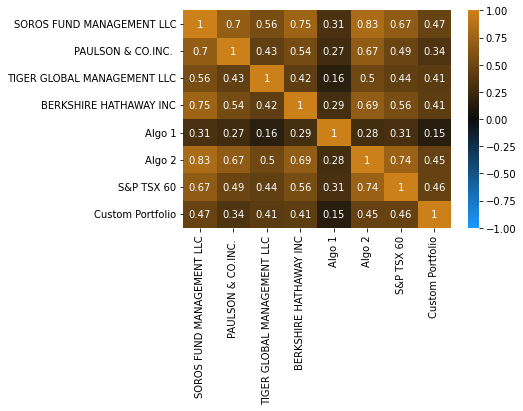

In [115]:
# Plot the correlation
# import seaborn as sns
# sns.heatmap(allportfolio_correlation, vmin=-1, vmax=1, annot=True)
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
clist = [(0.1, 0.6, 1.0), (0.05, 0.05, 0.05), (0.8, 0.5, 0.1)]
blue_orange_divergent = LinearSegmentedColormap.from_list("custom_blue_orange", clist)
sns.heatmap(allportfolio_correlation,vmin=-1, vmax=1,annot=True,cmap = blue_orange_divergent)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [116]:
# Calculate and plot Beta
# Calculate covariance of all daily returns of Custom Portfolio vs. S&P TSX 60
customportfolio_covariance = allportfolio_returns['Custom Portfolio'].cov(allportfolio_returns['S&P TSX 60'])
customportfolio_covariance

2.4889000378612816e-05

In [117]:
# Calculate variance of S&P TSX
variance_sptsx = all_returns['S&P TSX 60'].var()
variance_sptsx

4.9434802530161176e-05

In [118]:
# Computing beta
customportfolio_beta = customportfolio_covariance / variance_sptsx
customportfolio_beta

0.5034712207746259

<AxesSubplot:title={'center':'Rolling 60-Day Beta of Algo 1'}, xlabel='Date'>

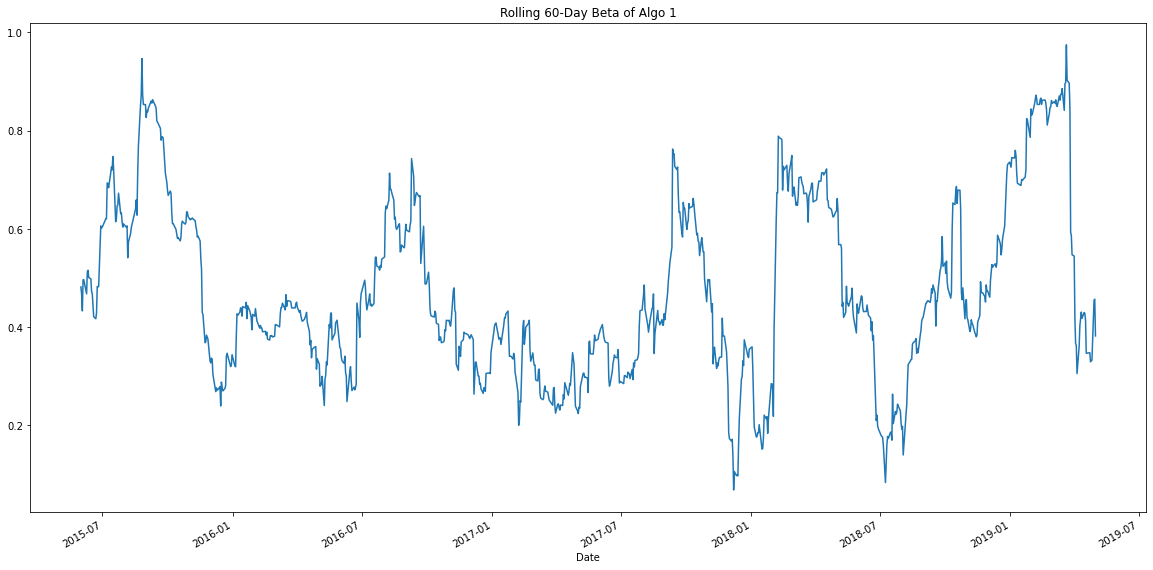

In [119]:
rolling_customportfolio_covariance = allportfolio_returns['Custom Portfolio'].rolling(window=60).cov(allportfolio_returns['S&P TSX 60'])
rolling_sptsxvariance = allportfolio_returns['S&P TSX 60'].rolling(window=60).var()
rolling_customportfoliobeta = rolling_customportfolio_covariance / rolling_sptsxvariance
rolling_customportfoliobeta.plot(figsize=(20,10), title='Rolling 60-Day Beta of Algo 1')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [124]:
# Calculate Annualized Sharpe Ratios
allportfolio_sharpe_ratios = ((allportfolio_returns.mean()-0) * 252) / np.sqrt((allportfolio_returns.var() * 252))
allportfolio_sharpe_ratios.sort_values(ascending=False)

Algo 1                         1.503395
Custom Portfolio               0.653238
BERKSHIRE HATHAWAY INC         0.474428
Algo 2                         0.435932
SOROS FUND MANAGEMENT LLC      0.307234
S&P TSX 60                     0.267289
TIGER GLOBAL MANAGEMENT LLC   -0.185661
PAULSON & CO.INC.             -0.460519
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

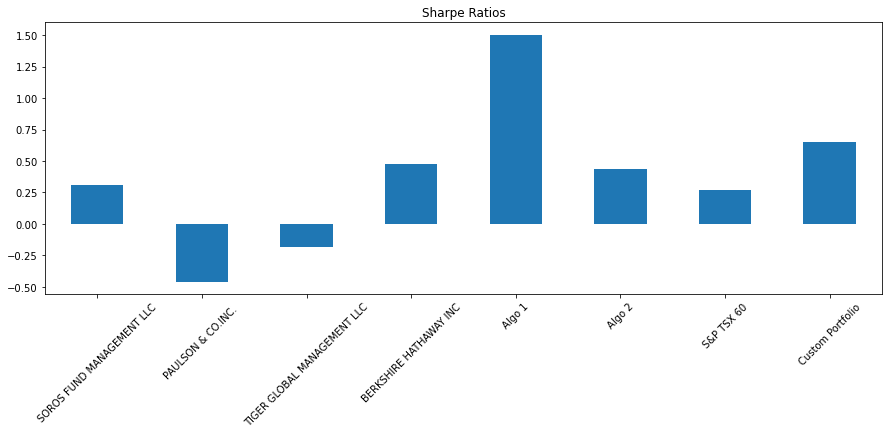

In [125]:
# Visualize the sharpe ratios as a bar plot
allportfolio_sharpe_ratios.plot(kind="bar", title="Sharpe Ratios", figsize=(15,5),rot=45)

### How does your portfolio do?

Write your answer here!